In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
warnings.filterwarnings("ignore", message="matplotlib.font_manager:findfont: Font family 'Arial' not found.")

In [2]:
iris=load_iris()
X=iris.data
y=iris.target

In [3]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(120, 4)
(30, 4)
(120,)
(30,)


In [4]:
#applying the algorithms
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier(criterion="gini")
dtc.fit(X_train,y_train)
y_pred=dtc.predict(X_test)
print(accuracy_score(y_test,y_pred))

1.0


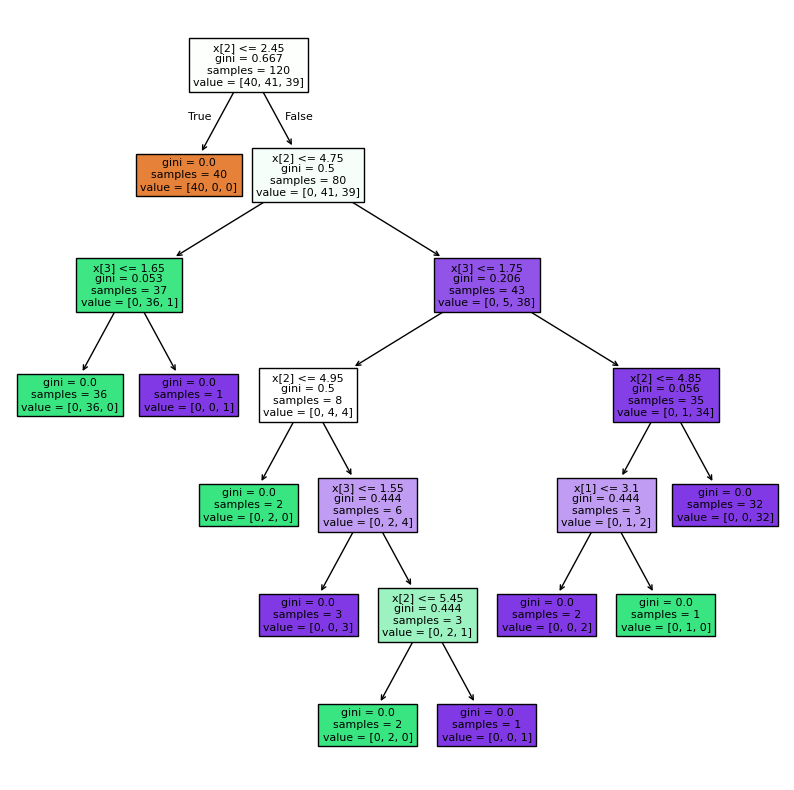

In [5]:
#plotting the tree
from sklearn.tree import plot_tree
plt.figure(figsize=(10,10))
plot_tree(dtc,filled=True)
plt.show()

In [6]:
#social networking ads
dataset=pd.read_csv("/content/Social_Network_Ads.csv")
dataset.Gender.replace({"Male":1,"Female":0},inplace=True)
dataset.head()
X=dataset.iloc[:,1:-1].values
y=dataset.iloc[:,-1].values
print(X.shape)
print(y.shape)

(400, 3)
(400,)


/tmp/ipython-input-3361047679.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset.Gender.replace({"Male":1,"Female":0},inplace=True)
/tmp/ipython-input-3361047679.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dataset.Gender.replace({"Male":1,"Female":0},inplace=True)


In [7]:
#splitting the data into train and test data
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(320, 3)
(80, 3)
(320,)
(80,)


In [8]:
#applying the algorithm
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier(criterion="gini",max_depth=3)
dtc.fit(X_train,y_train)
y_pred=dtc.predict(X_test)
print(accuracy_score(y_test,y_pred))

0.9125


[Text(0.5416666666666666, 0.875, 'x[1] <= 44.5\ngini = 0.46\nsamples = 320\nvalue = [205, 115]'),
 Text(0.3333333333333333, 0.625, 'x[2] <= 90500.0\ngini = 0.3\nsamples = 234\nvalue = [191, 43]'),
 Text(0.4375, 0.75, 'True  '),
 Text(0.16666666666666666, 0.375, 'x[1] <= 36.5\ngini = 0.07\nsamples = 193\nvalue = [186.0, 7.0]'),
 Text(0.08333333333333333, 0.125, 'gini = 0.0\nsamples = 126\nvalue = [126, 0]'),
 Text(0.25, 0.125, 'gini = 0.187\nsamples = 67\nvalue = [60, 7]'),
 Text(0.5, 0.375, 'x[2] <= 133500.0\ngini = 0.214\nsamples = 41\nvalue = [5, 36]'),
 Text(0.4166666666666667, 0.125, 'gini = 0.293\nsamples = 28\nvalue = [5, 23]'),
 Text(0.5833333333333334, 0.125, 'gini = 0.0\nsamples = 13\nvalue = [0, 13]'),
 Text(0.75, 0.625, 'x[2] <= 40500.0\ngini = 0.273\nsamples = 86\nvalue = [14.0, 72.0]'),
 Text(0.6458333333333333, 0.75, '  False'),
 Text(0.6666666666666666, 0.375, 'gini = 0.0\nsamples = 27\nvalue = [0, 27]'),
 Text(0.8333333333333334, 0.375, 'x[2] <= 84500.0\ngini = 0.362\ns

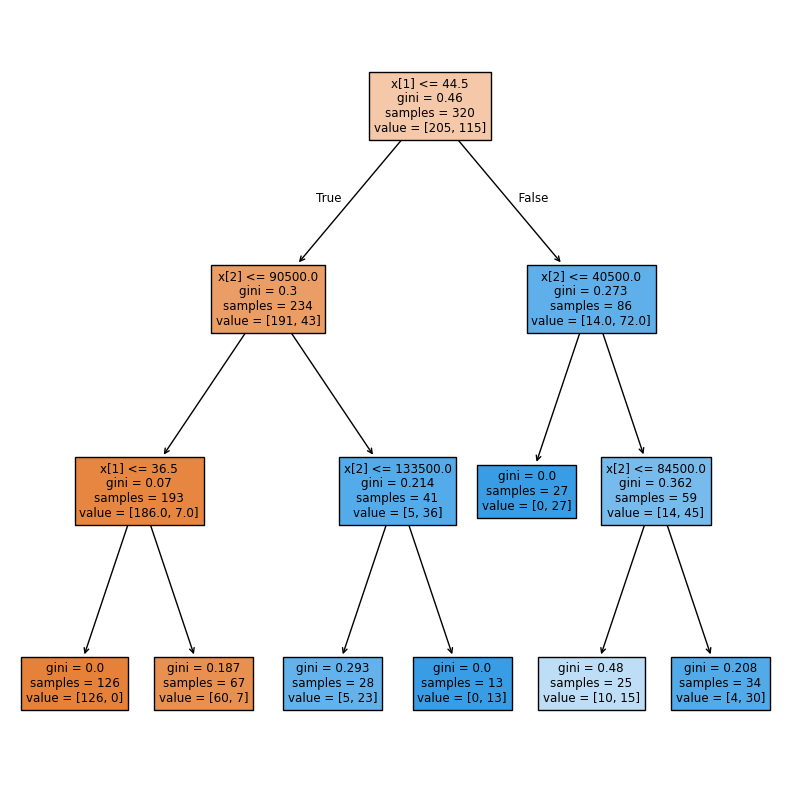

In [9]:
#printing the tree
from sklearn.tree import plot_tree
plt.figure(figsize=(10,10))
plot_tree(dtc,filled=True)

(594440, 2)


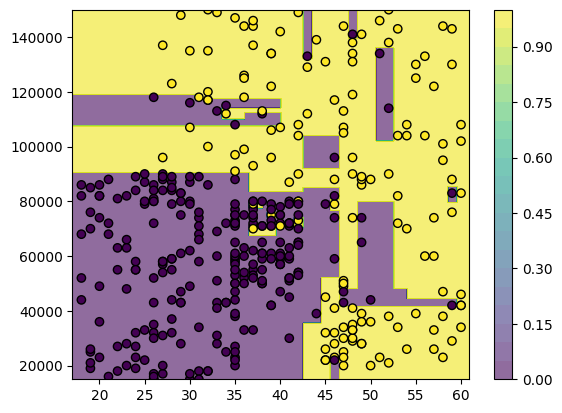

In [10]:
#plotting the decision boundary
def plot_decision_boundary(X,y,max_depth):
  #mesh grid
  x_min,x_max=X[:,0].min()-1,X[:,0].max()+1
  y_min,y_max=X[:,1].min()-1,X[:,1].max()+1
  xx,yy=np.meshgrid(np.arange(x_min,x_max,0.1),np.arange(y_min,y_max,100))
  #creating the model
  model=DecisionTreeClassifier(criterion="gini",max_depth=max_depth)
  model.fit(X,y)
  #test data
  test_data=np.c_[xx.ravel(),yy.ravel()]
  print(test_data.shape)
  predicted=model.predict(test_data)
  contour = plt.contourf(xx, yy, predicted.reshape(xx.shape), levels=20, cmap='viridis', alpha=0.6)
  plt.colorbar(contour)
  plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', edgecolors='k')
X=dataset.iloc[:,2:-1].values
y=dataset.iloc[:,-1].values
plot_decision_boundary(X,y,max_depth=None)

(594440, 2)


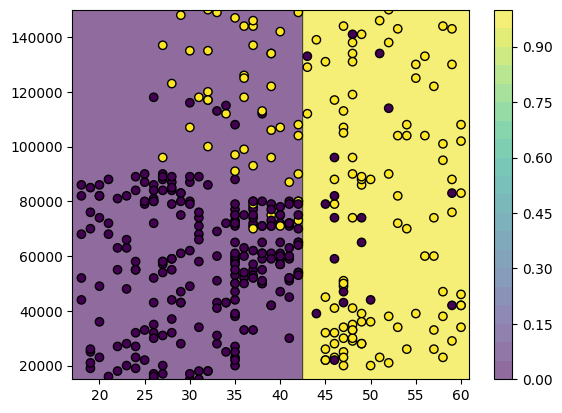

In [11]:
#for max depth 2
plot_decision_boundary(X,y,max_depth=1)

**Hyper parameters in Decision Tree Classifier:**



1. **criterion:**The function to measure the quality of a split. Supported criteria are “gini” for the Gini impurity and “log_loss” and “entropy” both for the Shannon information gain



In [12]:
from sklearn.tree import DecisionTreeClassifier
#using entropy
dtc=DecisionTreeClassifier(criterion="entropy")
dtc.fit(X_train,y_train)
y_pred=dtc.predict(X_test)
print(accuracy_score(y_test,y_pred))

0.8375


In [13]:
#using the gini impurity
dtc=DecisionTreeClassifier(criterion="gini")
dtc.fit(X_train,y_train)
y_pred=dtc.predict(X_test)
print(accuracy_score(y_test,y_pred))

0.85


In [14]:
#using the log loss
dtc=DecisionTreeClassifier(criterion="log_loss")
dtc.fit(X_train,y_train)
y_pred=dtc.predict(X_test)
print(accuracy_score(y_test,y_pred))

0.825


2.**Splitter**:The strategy used to choose the split at each node. Supported
strategies are “best” to choose the best split and “random” to choose the best random split.

In [15]:
dtc=DecisionTreeClassifier(splitter="best")
dtc.fit(X_train,y_train)
y_pred=dtc.predict(X_test)
print(accuracy_score(y_test,y_pred))

0.85


In [16]:
#it will select the random split
dtc=DecisionTreeClassifier(splitter="random")
dtc.fit(X_train,y_train)
y_pred=dtc.predict(X_test)
print(accuracy_score(y_test,y_pred))

0.9




3.**max_depth**:The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.High value for the max depth parameter will lead to overfitting and lower value for the parameter will lead to the underfitting..



In [17]:
dtc=DecisionTreeClassifier(max_depth=None)
dtc.fit(X_train,y_train)
y_pred=dtc.predict(X_test)
print(accuracy_score(y_test,y_pred))

0.85


In [18]:
dtc=DecisionTreeClassifier(max_depth=1)
dtc.fit(X_train,y_train)
y_pred=dtc.predict(X_test)
print(accuracy_score(y_test,y_pred))

0.9


In [19]:
dtc=DecisionTreeClassifier(max_depth=4)
dtc.fit(X_train,y_train)
y_pred=dtc.predict(X_test)
print(accuracy_score(y_test,y_pred))

0.9125




4.**min_samples_split**:The minimum number of samples required to split an internal node



0.825


[Text(0.5238095238095238, 0.9642857142857143, 'x[1] <= 44.5\ngini = 0.46\nsamples = 320\nvalue = [205, 115]'),
 Text(0.2976190476190476, 0.8928571428571429, 'x[2] <= 90500.0\ngini = 0.3\nsamples = 234\nvalue = [191, 43]'),
 Text(0.4107142857142857, 0.9285714285714286, 'True  '),
 Text(0.16666666666666666, 0.8214285714285714, 'x[1] <= 36.5\ngini = 0.07\nsamples = 193\nvalue = [186.0, 7.0]'),
 Text(0.14285714285714285, 0.75, 'gini = 0.0\nsamples = 126\nvalue = [126, 0]'),
 Text(0.19047619047619047, 0.75, 'x[2] <= 83500.0\ngini = 0.187\nsamples = 67\nvalue = [60, 7]'),
 Text(0.16666666666666666, 0.6785714285714286, 'x[2] <= 67500.0\ngini = 0.165\nsamples = 66\nvalue = [60, 6]'),
 Text(0.14285714285714285, 0.6071428571428571, 'gini = 0.0\nsamples = 33\nvalue = [33, 0]'),
 Text(0.19047619047619047, 0.6071428571428571, 'x[1] <= 41.5\ngini = 0.298\nsamples = 33\nvalue = [27, 6]'),
 Text(0.11904761904761904, 0.5357142857142857, 'x[2] <= 70500.0\ngini = 0.245\nsamples = 28\nvalue = [24, 4]'),
 

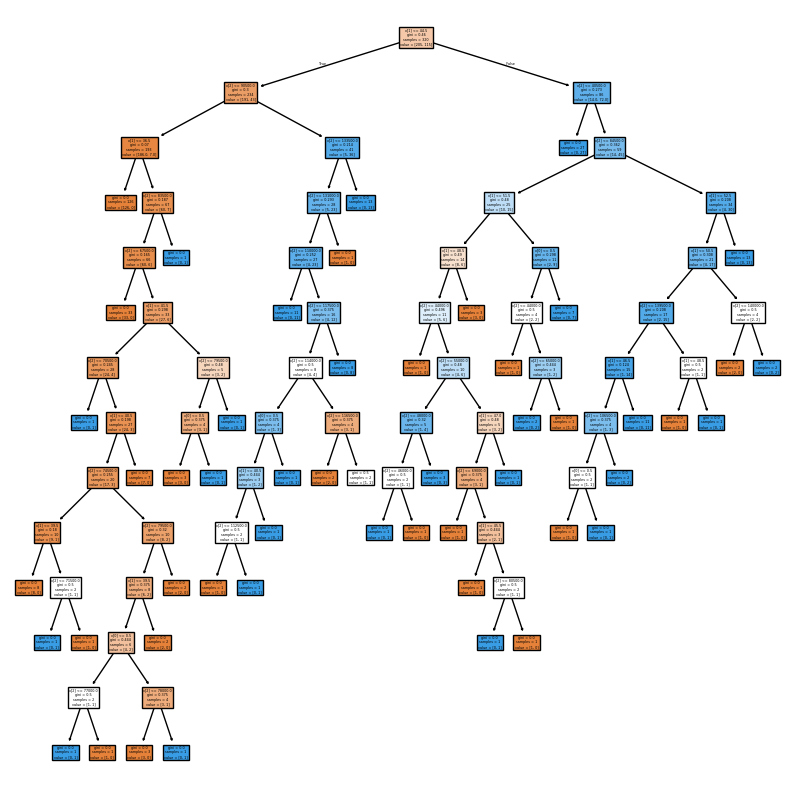

In [20]:
dtc=DecisionTreeClassifier(min_samples_split=2)#default value(case of overfitting)
dtc.fit(X_train,y_train)
y_pred=dtc.predict(X_test)
print(accuracy_score(y_test,y_pred))
from sklearn.tree import plot_tree
plt.figure(figsize=(10,10))
plot_tree(dtc,filled=True)

0.9125


[Text(0.6666666666666666, 0.875, 'x[1] <= 44.5\ngini = 0.46\nsamples = 320\nvalue = [205, 115]'),
 Text(0.5, 0.625, 'x[2] <= 90500.0\ngini = 0.3\nsamples = 234\nvalue = [191, 43]'),
 Text(0.5833333333333333, 0.75, 'True  '),
 Text(0.3333333333333333, 0.375, 'x[1] <= 36.5\ngini = 0.07\nsamples = 193\nvalue = [186.0, 7.0]'),
 Text(0.16666666666666666, 0.125, 'gini = 0.0\nsamples = 126\nvalue = [126, 0]'),
 Text(0.5, 0.125, 'gini = 0.187\nsamples = 67\nvalue = [60, 7]'),
 Text(0.6666666666666666, 0.375, 'gini = 0.214\nsamples = 41\nvalue = [5, 36]'),
 Text(0.8333333333333334, 0.625, 'gini = 0.273\nsamples = 86\nvalue = [14.0, 72.0]'),
 Text(0.75, 0.75, '  False')]

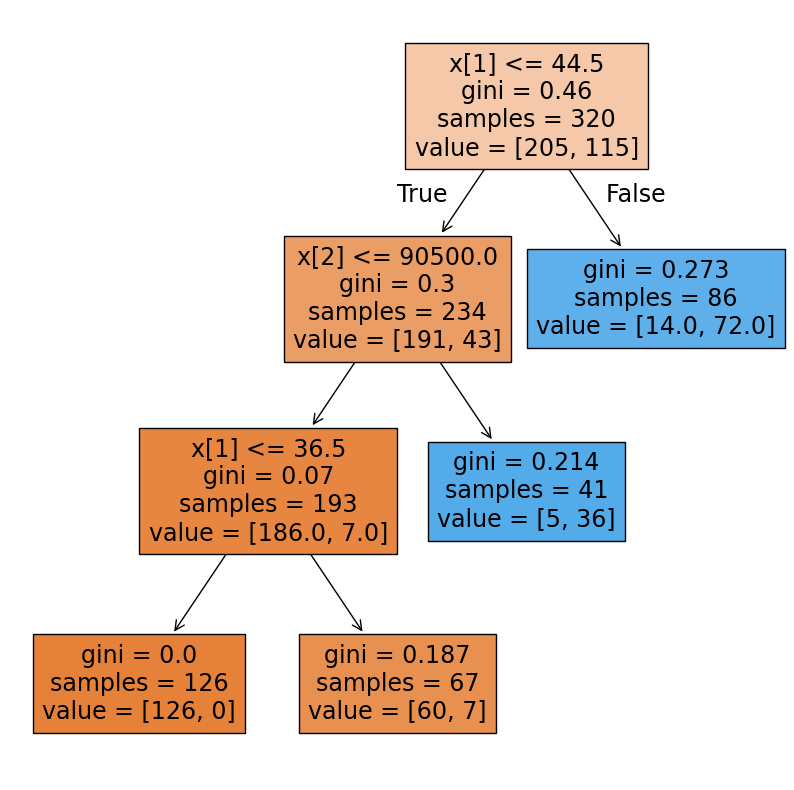

In [21]:
dtc=DecisionTreeClassifier(min_samples_split=100)
dtc.fit(X_train,y_train)
y_pred=dtc.predict(X_test)
print(accuracy_score(y_test,y_pred))
from sklearn.tree import plot_tree
plt.figure(figsize=(10,10))
plot_tree(dtc,filled=True)



5.**min_samples_leaf**:The minimum number of samples required to be at a leaf node. A split point at any depth will only be considered if it leaves at least min_samples_leaf training samples in each of the left and right branches.



0.825


[Text(0.540625, 0.95, 'x[1] <= 44.5\ngini = 0.46\nsamples = 320\nvalue = [205, 115]'),
 Text(0.2875, 0.85, 'x[2] <= 90500.0\ngini = 0.3\nsamples = 234\nvalue = [191, 43]'),
 Text(0.4140625, 0.8999999999999999, 'True  '),
 Text(0.125, 0.75, 'x[1] <= 36.5\ngini = 0.07\nsamples = 193\nvalue = [186.0, 7.0]'),
 Text(0.1, 0.65, 'gini = 0.0\nsamples = 126\nvalue = [126, 0]'),
 Text(0.15, 0.65, 'x[2] <= 67500.0\ngini = 0.187\nsamples = 67\nvalue = [60, 7]'),
 Text(0.125, 0.55, 'gini = 0.0\nsamples = 33\nvalue = [33, 0]'),
 Text(0.175, 0.55, 'x[0] <= 0.5\ngini = 0.327\nsamples = 34\nvalue = [27, 7]'),
 Text(0.05, 0.45, 'x[2] <= 74000.0\ngini = 0.198\nsamples = 18\nvalue = [16, 2]'),
 Text(0.025, 0.35, 'gini = 0.0\nsamples = 9\nvalue = [9, 0]'),
 Text(0.075, 0.35, 'x[1] <= 38.5\ngini = 0.346\nsamples = 9\nvalue = [7, 2]'),
 Text(0.05, 0.25, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.1, 0.25, 'x[1] <= 39.5\ngini = 0.408\nsamples = 7\nvalue = [5, 2]'),
 Text(0.075, 0.15, 'gini = 0.5\nsamp

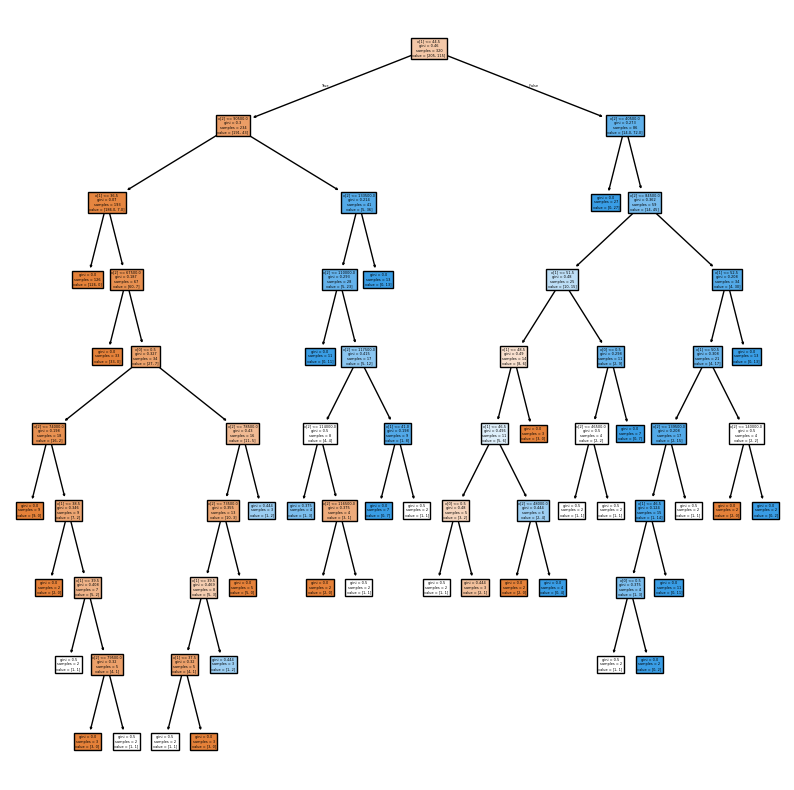

In [22]:
dtc=DecisionTreeClassifier(min_samples_leaf=2)#default value 2(case of overfitting)
dtc.fit(X_train,y_train)
y_pred=dtc.predict(X_test)
print(accuracy_score(y_test,y_pred))
from sklearn.tree import plot_tree
plt.figure(figsize=(10,10))
plot_tree(dtc,filled=True)

0.9125


[Text(0.5555555555555556, 0.875, 'x[1] <= 44.5\ngini = 0.46\nsamples = 320\nvalue = [205, 115]'),
 Text(0.3333333333333333, 0.625, 'x[2] <= 90500.0\ngini = 0.3\nsamples = 234\nvalue = [191, 43]'),
 Text(0.4444444444444444, 0.75, 'True  '),
 Text(0.2222222222222222, 0.375, 'x[1] <= 36.5\ngini = 0.07\nsamples = 193\nvalue = [186.0, 7.0]'),
 Text(0.1111111111111111, 0.125, 'gini = 0.0\nsamples = 126\nvalue = [126, 0]'),
 Text(0.3333333333333333, 0.125, 'gini = 0.187\nsamples = 67\nvalue = [60, 7]'),
 Text(0.4444444444444444, 0.375, 'gini = 0.214\nsamples = 41\nvalue = [5, 36]'),
 Text(0.7777777777777778, 0.625, 'x[2] <= 62500.0\ngini = 0.273\nsamples = 86\nvalue = [14.0, 72.0]'),
 Text(0.6666666666666667, 0.75, '  False'),
 Text(0.6666666666666666, 0.375, 'gini = 0.214\nsamples = 41\nvalue = [5, 36]'),
 Text(0.8888888888888888, 0.375, 'gini = 0.32\nsamples = 45\nvalue = [9, 36]')]

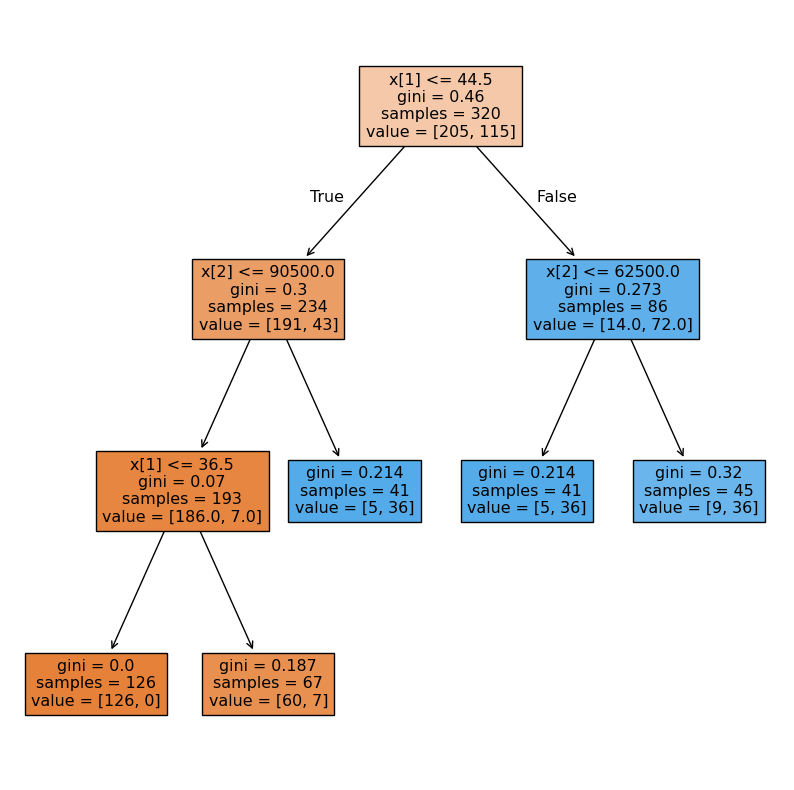

In [23]:
dtc=DecisionTreeClassifier(min_samples_leaf=40)#default value(case of overfitting) all the leaf nodes should have atleast 40 samples
dtc.fit(X_train,y_train)
y_pred=dtc.predict(X_test)
print(accuracy_score(y_test,y_pred))
from sklearn.tree import plot_tree
plt.figure(figsize=(10,10))
plot_tree(dtc,filled=True)



1. **max_features**:The number of features to consider when looking for the best split


*   If “sqrt”, then max_features=sqrt(n_features).
*   If “log2”, then max_features=log2(n_features).
*   If None, then max_features=n_features.



0.8875


[Text(0.5401785714285714, 0.9615384615384616, 'x[1] <= 44.5\ngini = 0.46\nsamples = 320\nvalue = [205, 115]'),
 Text(0.25, 0.8846153846153846, 'x[0] <= 0.5\ngini = 0.3\nsamples = 234\nvalue = [191, 43]'),
 Text(0.3950892857142857, 0.9230769230769231, 'True  '),
 Text(0.11607142857142858, 0.8076923076923077, 'x[2] <= 91000.0\ngini = 0.284\nsamples = 111\nvalue = [92, 19]'),
 Text(0.05357142857142857, 0.7307692307692307, 'x[1] <= 38.5\ngini = 0.043\nsamples = 90\nvalue = [88, 2]'),
 Text(0.03571428571428571, 0.6538461538461539, 'gini = 0.0\nsamples = 68\nvalue = [68, 0]'),
 Text(0.07142857142857142, 0.6538461538461539, 'x[2] <= 74000.0\ngini = 0.165\nsamples = 22\nvalue = [20, 2]'),
 Text(0.05357142857142857, 0.5769230769230769, 'gini = 0.0\nsamples = 15\nvalue = [15, 0]'),
 Text(0.08928571428571429, 0.5769230769230769, 'x[2] <= 79500.0\ngini = 0.408\nsamples = 7\nvalue = [5, 2]'),
 Text(0.05357142857142857, 0.5, 'x[2] <= 77000.0\ngini = 0.32\nsamples = 5\nvalue = [4, 1]'),
 Text(0.03571

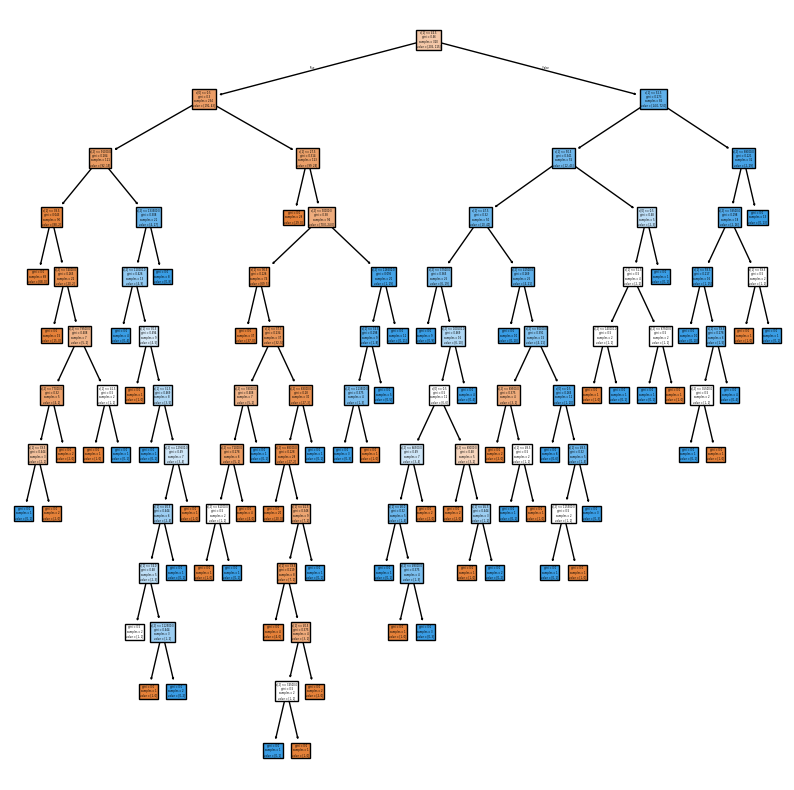

In [24]:
dtc=DecisionTreeClassifier(max_features="log2")#default value(case of overfitting)
dtc.fit(X_train,y_train)
y_pred=dtc.predict(X_test)
print(accuracy_score(y_test,y_pred))
from sklearn.tree import plot_tree
plt.figure(figsize=(10,10))
plot_tree(dtc,filled=True)



7.**min_impurity_decrease**:A node will be split if this split induces a decrease of the impurity greater than or equal to this value.



0.9125


[Text(0.6, 0.8333333333333334, 'x[1] <= 44.5\ngini = 0.46\nsamples = 320\nvalue = [205, 115]'),
 Text(0.4, 0.5, 'x[2] <= 90500.0\ngini = 0.3\nsamples = 234\nvalue = [191, 43]'),
 Text(0.5, 0.6666666666666667, 'True  '),
 Text(0.2, 0.16666666666666666, 'gini = 0.07\nsamples = 193\nvalue = [186.0, 7.0]'),
 Text(0.6, 0.16666666666666666, 'gini = 0.214\nsamples = 41\nvalue = [5, 36]'),
 Text(0.8, 0.5, 'gini = 0.273\nsamples = 86\nvalue = [14.0, 72.0]'),
 Text(0.7, 0.6666666666666667, '  False')]

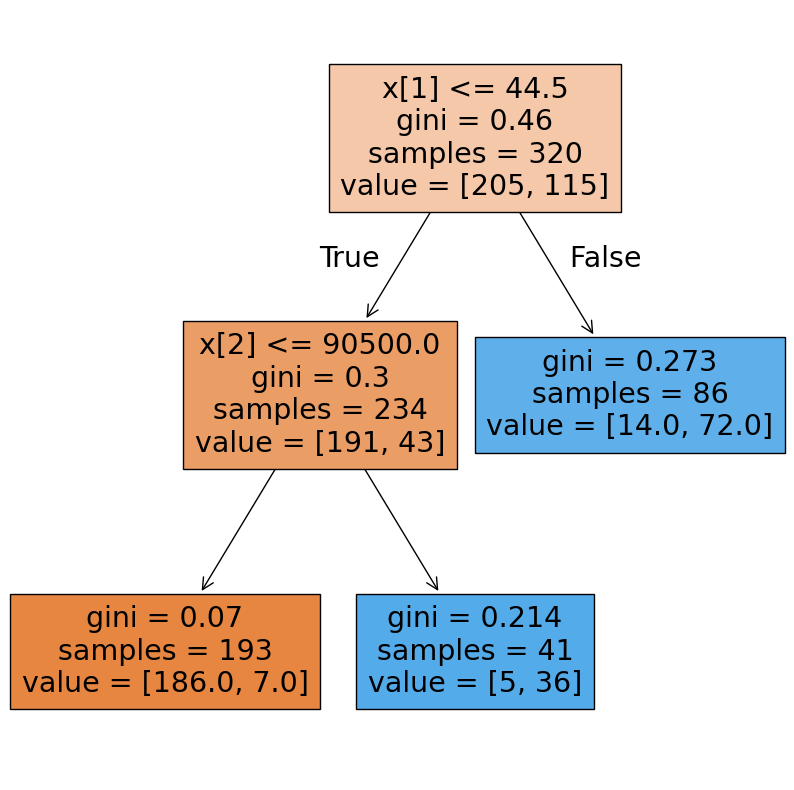

In [25]:
dtc=DecisionTreeClassifier(min_impurity_decrease=0.1)#default value(case of overfitting)
dtc.fit(X_train,y_train)
y_pred=dtc.predict(X_test)
print(accuracy_score(y_test,y_pred))
from sklearn.tree import plot_tree
plt.figure(figsize=(10,10))
plot_tree(dtc,filled=True)

**Hyper parameter Tuning Using GridSearchCv**

In [26]:
from sklearn.model_selection import GridSearchCV
params={"criterion":["gini","entropy","log_loss"],
        "splitter":["best","random"],
        "max_depth":[1,2,3,4,None]}
grid=GridSearchCV(DecisionTreeClassifier(),params,cv=10)
grid.fit(X_train,y_train)
print(grid.best_params_)
print(grid.best_score_)

{'criterion': 'gini', 'max_depth': 2, 'splitter': 'best'}
0.9125


**Grid Search Cv on diabetes dataset**

In [28]:
#importing the dataset
diabetes=pd.read_csv("/content/pima_indians_diabetis.csv")
X=diabetes.iloc[:,:-1].values
y=diabetes.iloc[:,-1].values

In [29]:
#splitting the data into train and test data
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [30]:
#importing the decision tree classifier
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier()
dtc.fit(X_train,y_train)
y_pred=dtc.predict(X_test)
print(accuracy_score(y_test,y_pred))

0.7402597402597403


In [31]:
#perfoming the grid search cv on the data
from sklearn.model_selection import GridSearchCV
params={"criterion":["gini","entropy","log_loss"],
        "splitter":["best","random"],
        "max_depth":[1,2,3,4,5,6,7,8,9,10,None],
        }
grid=GridSearchCV(DecisionTreeClassifier(),params,cv=10)
grid.fit(X_train,y_train)
print(grid.best_params_)
print(grid.best_score_)

{'criterion': 'entropy', 'max_depth': 3, 'splitter': 'best'}
0.7492596509783184


### **Regression Trees:**

#### A regression tree is a machine learning model that predicts a continuous target value by recursively splitting the dataset into smaller groups based on feature thresholds. At each terminal node (leaf), the prediction is typically the mean of the target variable for that group.

   Feature    Target
0  0.00000  0.248357
1  0.10101  0.283888
2  0.20202  1.026801
3  0.30303  1.808271
4  0.40404  1.264353


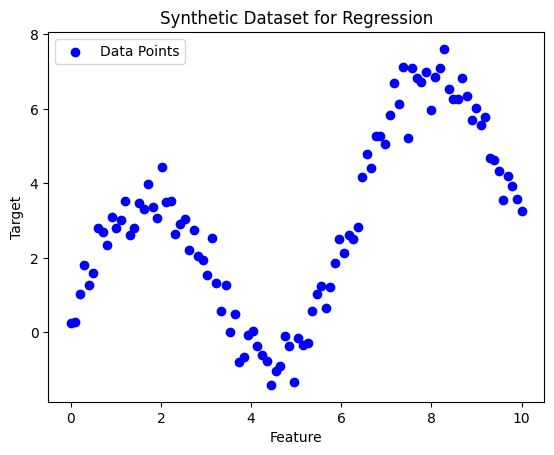

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# Set a random seed for reproducibility
np.random.seed(42)
# Generate the feature (X)
X = np.linspace(0, 10, 100)  # 100 evenly spaced values between 0 and 10
# Generate the target (y) with a non-linear relationship and added noise
y = 3 * np.sin(X) + 0.5 * X + np.random.normal(0, 0.5, size=X.shape)
# Convert to a pandas DataFrame for better usability
df = pd.DataFrame({'Feature': X, 'Target': y})
df.to_csv('regression_data.csv', index=False)
# Display the first few rows of the dataset
print(df.head())
# Visualize the dataset
plt.scatter(X, y, color='blue', label='Data Points')
plt.xlabel('Feature')
plt.ylabel('Target')
plt.title('Synthetic Dataset for Regression')
plt.legend()
plt.show()

In [33]:
#train test split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42,test_size=0.20)

In [34]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import accuracy_score
dtr=DecisionTreeRegressor(max_depth=3)
dtr.fit(X_train.reshape(-1,1),y_train)
y_pred=dtr.predict(X_test.reshape(-1,1))
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R-squared (R^2): {r2}")

Mean Squared Error (MSE): 0.8644166882009261
Mean Absolute Error (MAE): 0.7257241594193004
R-squared (R^2): 0.8905546567000435


[Text(0.5, 0.875, 'x[0] <= 6.414\nsquared_error = 5.419\nsamples = 80\nvalue = 2.945'),
 Text(0.25, 0.625, 'x[0] <= 3.081\nsquared_error = 2.241\nsamples = 51\nvalue = 1.539'),
 Text(0.375, 0.75, 'True  '),
 Text(0.125, 0.375, 'x[0] <= 0.556\nsquared_error = 0.785\nsamples = 24\nvalue = 2.641'),
 Text(0.0625, 0.125, 'squared_error = 0.347\nsamples = 4\nvalue = 1.176'),
 Text(0.1875, 0.125, 'squared_error = 0.358\nsamples = 20\nvalue = 2.934'),
 Text(0.375, 0.375, 'x[0] <= 5.354\nsquared_error = 1.495\nsamples = 27\nvalue = 0.559'),
 Text(0.3125, 0.125, 'squared_error = 0.472\nsamples = 17\nvalue = -0.208'),
 Text(0.4375, 0.125, 'squared_error = 0.538\nsamples = 10\nvalue = 1.861'),
 Text(0.75, 0.625, 'x[0] <= 9.242\nsquared_error = 1.407\nsamples = 29\nvalue = 5.419'),
 Text(0.625, 0.75, '  False'),
 Text(0.625, 0.375, 'x[0] <= 7.071\nsquared_error = 0.822\nsamples = 21\nvalue = 5.952'),
 Text(0.5625, 0.125, 'squared_error = 0.175\nsamples = 6\nvalue = 4.836'),
 Text(0.6875, 0.125, 'sq

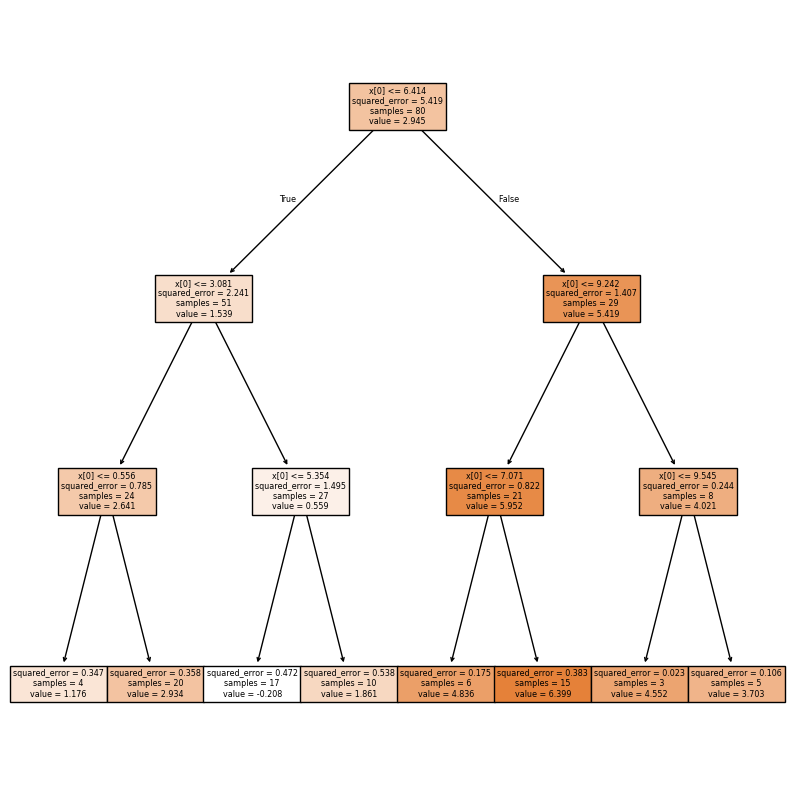

In [35]:
from sklearn.tree import plot_tree
plt.figure(figsize=(10,10))
plot_tree(dtr,filled=True)

### **DtreeViz library to visualize the Decision Trees:**

In [36]:
import sys
import os
%config InlineBackend.figure_format = 'retina' # Make visualizations look good
#%config InlineBackend.figure_format = 'svg'
%matplotlib inline

if 'google.colab' in sys.modules:
  !pip install -q dtreeviz

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.8/91.8 kB 4.9 MB/s eta 0:00:00


In [37]:
import dtreeviz

In [39]:
#importing the dataset
dataset=pd.read_csv("/content/PlayTennis.csv")
X,y=dataset.iloc[:,:-1],dataset.iloc[:,-1]
features=dataset.columns[:-1]
target=dataset.columns[-1]
class_names=list(dataset.iloc[:,-1].unique())


In [40]:
#converting the categorical values to numerical values
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
X=X.apply(le.fit_transform)
y.replace({"Yes":1,"No":0},inplace=True)

/tmp/ipython-input-3200326964.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`


In [41]:
#splitting the data into train and test
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [42]:
#training the model on the data
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier()
dtc.fit(X_train,y_train)

DecisionTreeClassifier()

In [43]:
viz_model = dtreeviz.model(dtc,
                           X_train, y_train,
                           feature_names=features,
                           target_name=target,
                           class_names=["Yes","No"],
                           )

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names


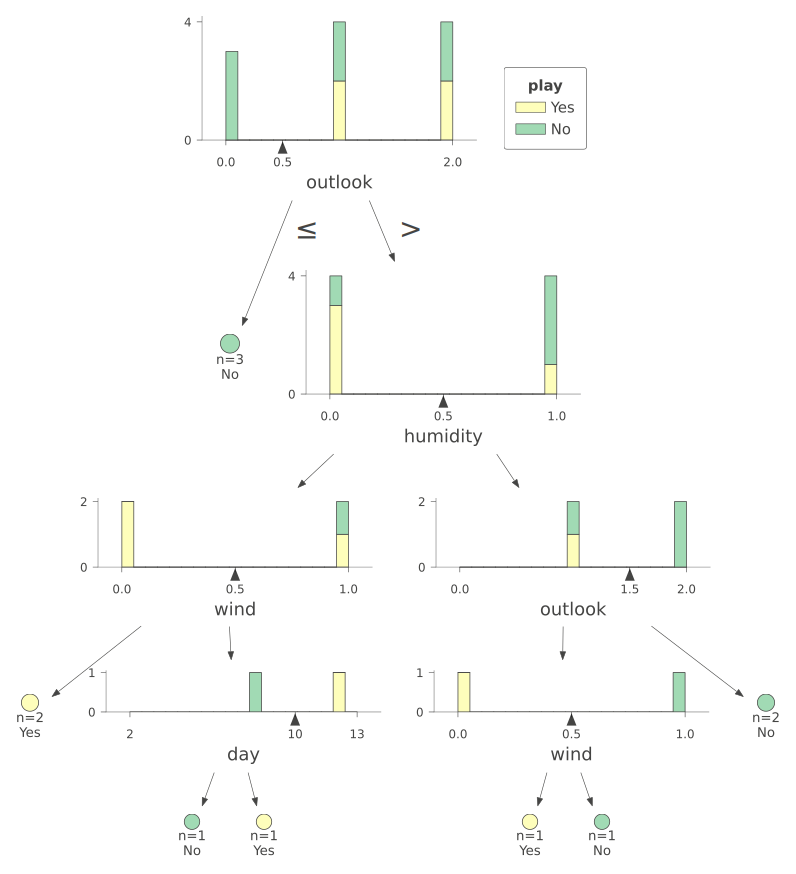

In [44]:
viz_model.view(scale=2,fontname="sans-serif")

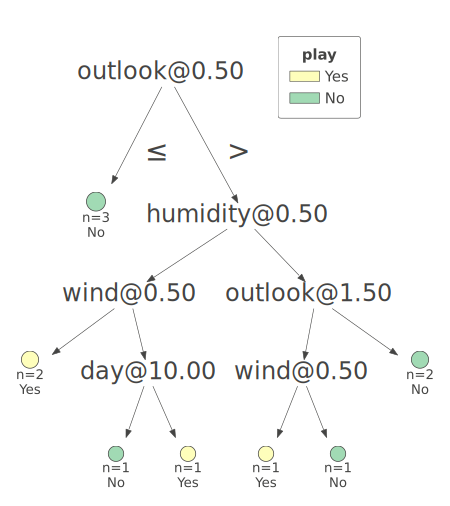

In [45]:
viz_model.view(scale=2,fancy=False,fontname="sans-serif")

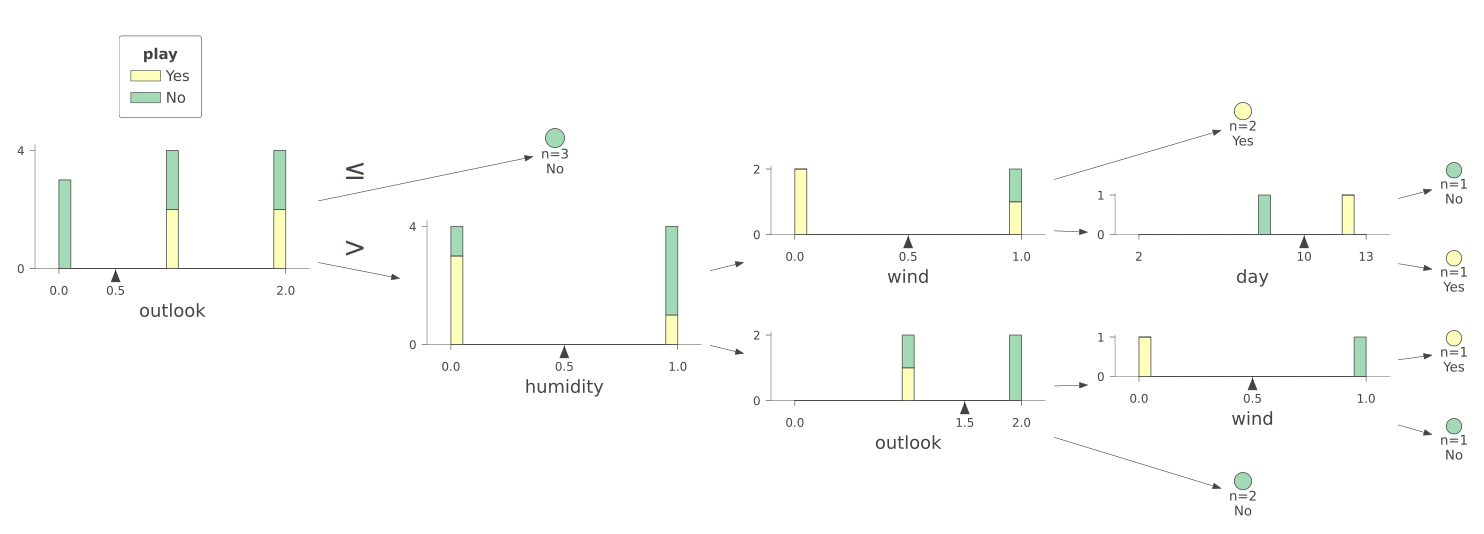

In [46]:
viz_model.view(scale=2,orientation='LR',fontname="sans-serif")

/usr/local/lib/python3.12/dist-packages/dtreeviz/models/shadow_decision_tree.py:335: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
/usr/local/lib/python3.12/dist-packages/dtreeviz/trees.py:1231: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`


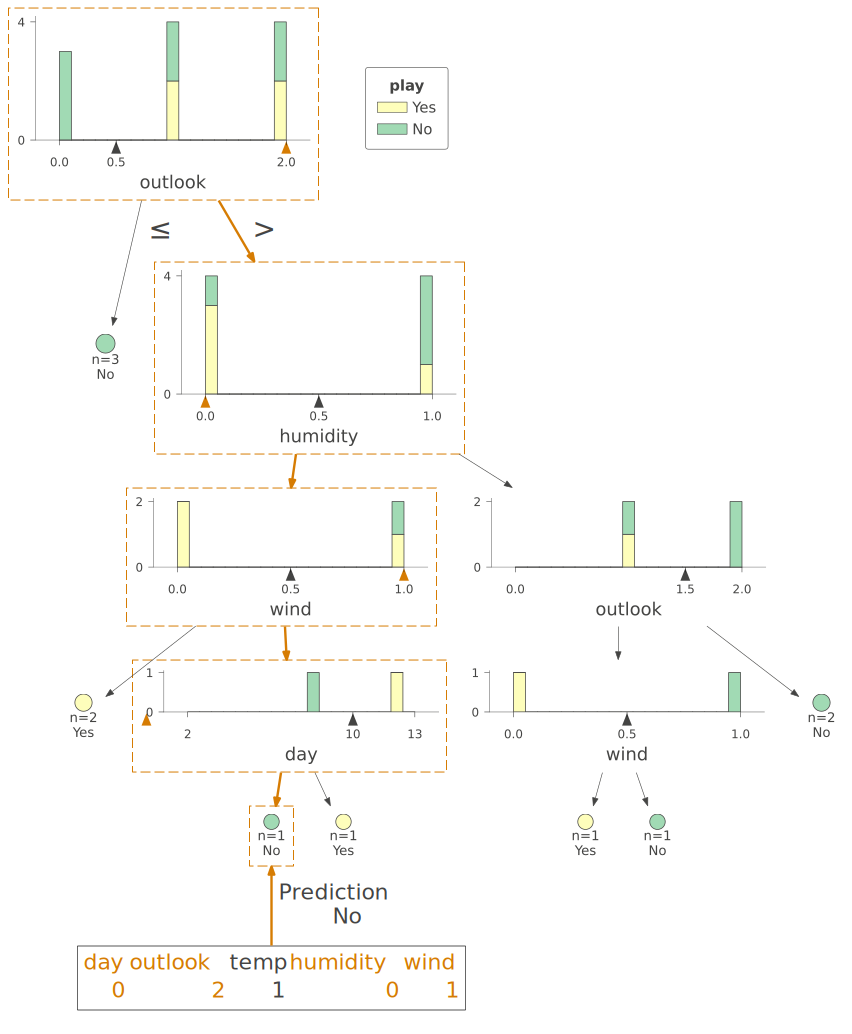

In [47]:
viz_model.view(x=X.iloc[0,:],scale=2,fontname="sans-serif")
